In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#import matplotlib as mpl

def truncate(number: float, max_decimals: int) -> float:
    int_part, dec_part = str(number).split(".")
    return float(".".join((int_part, dec_part[:max_decimals])))

In [2]:
os.chdir(r"C:\Users\c-lop\Documents\GitHub\Radioterapia_SS\OF")
         
AAA = pd.read_csv("filtrado_AAA13_TruebeamSTx6FFF_Open Field - 00_Output Factors.csv",index_col=0)
GD = pd.read_csv("golden_data_OF.csv",index_col=0)

In [3]:
AAA = AAA.loc[AAA.index.intersection(GD.index), AAA.columns.intersection(GD.columns)]
GD = GD.loc[GD.index.intersection(AAA.index), GD.columns.intersection(AAA.columns)]

In [4]:
AAA.to_numpy()
AAA

,3,4,5,7,10,15,20,30,40
3,0.845,0.859,0.870,0.883,0.892,0.898,0.901,0.904,0.905
4,0.859,0.876,0.890,0.907,0.921,0.930,0.936,0.939,0.940
5,0.869,0.890,0.905,0.925,0.942,0.954,0.960,0.964,0.966
7,0.884,0.907,0.925,0.951,0.973,0.990,0.997,1.003,1.005
10,0.895,0.921,0.943,0.973,1.000,1.021,1.032,1.041,1.043
15,0.904,0.933,0.957,0.991,1.024,1.050,1.064,1.076,1.081
20,0.908,0.937,0.962,0.999,1.033,1.064,1.081,1.096,1.100
30,0.912,0.942,0.969,1.007,1.045,1.079,1.098,1.116,1.122
40,0.914,0.945,0.971,1.010,1.049,1.084,1.104,1.124,1.129


In [5]:
GD.to_numpy()
GD

,3,4,5,7,10,15,20,30,40
3,0.896,0.907,0.914,0.922,0.928,0.932,0.934,0.937,0.937
4,0.907,0.921,0.929,0.940,0.947,0.953,0.956,0.958,0.959
5,0.914,0.930,0.940,0.952,0.962,0.969,0.972,0.975,0.976
7,0.925,0.943,0.955,0.970,0.982,0.991,0.996,1.000,1.001
10,0.933,0.953,0.967,0.985,1.000,1.012,1.018,1.024,1.025
15,0.938,0.960,0.975,0.996,1.013,1.029,1.038,1.046,1.048
20,0.941,0.963,0.979,1.001,1.020,1.038,1.049,1.058,1.060
30,0.944,0.967,0.983,1.006,1.028,1.048,1.061,1.072,1.075
40,0.945,0.968,0.985,1.009,1.031,1.052,1.065,1.078,1.080


In [6]:
error_porcentual_relativo = np.abs(GD - AAA) / np.abs(GD) * 100
np.mean(error_porcentual_relativo)

2.631886673471803

In [7]:
error_porcentual_relativo= pd.DataFrame(error_porcentual_relativo, index=AAA.index, columns=AAA.columns)

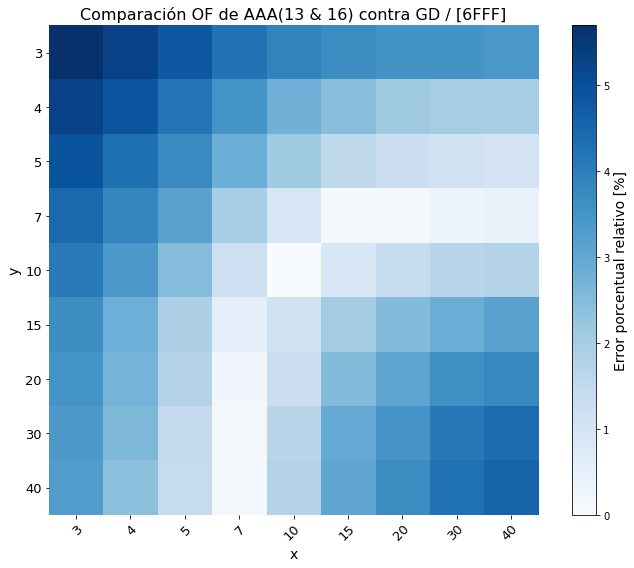

In [8]:
tc = ["3","4","5","7","10","15","20","30","40"]

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(error_porcentual_relativo,cmap="Blues")


ax.set_xticks(np.arange(len(tc)), labels=tc, fontsize=13)
ax.set_yticks(np.arange(len(tc)), labels=tc, fontsize=13)

ax.spines[:].set_visible(False)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Comparación OF de AAA(13 & 16) contra GD / [6FFF]",size=16)
cb = fig.colorbar(im, ax=ax)
cb.set_label("Error porcentual relativo [%]", rotation=90,size=14)
plt.xlabel("x",size=14)
plt.ylabel("y",size=14)
fig.tight_layout()
plt.savefig("OF_AAA_GD.svg",bbox_inches="tight")
plt.savefig("OF_AAA_GD.jpg",bbox_inches="tight",dpi=300)

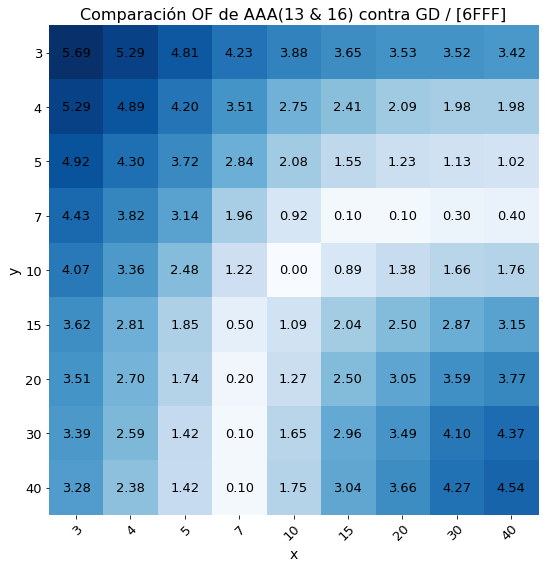

In [9]:
tc = ["3","4","5","7","10","15","20","30","40"]

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(error_porcentual_relativo,cmap="Blues")


ax.set_xticks(np.arange(len(tc)), labels=tc, fontsize=13)
ax.set_yticks(np.arange(len(tc)), labels=tc, fontsize=13)

ax.spines[:].set_visible(False)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(tc)):
    for j in range(len(tc)):
        text = ax.text(j, i, f"{error_porcentual_relativo.iloc[i, j]:.2f}",
                       ha="center", va="center", color="k", fontsize=13, fontweight="book")

ax.set_title("Comparación OF de AAA(13 & 16) contra GD / [6FFF]",size=16)
#cb = fig.colorbar(im, ax=ax)
#cb.set_label("Error porcentual relativo [%]", rotation=90,size=14)
plt.xlabel("x",size=14)
plt.ylabel("y",size=14)
fig.tight_layout()
plt.savefig("OF_AAA_GD_nom.svg",bbox_inches="tight")
plt.savefig("OF_AAA_GD_nom.jpg",bbox_inches="tight",dpi=300)